<a href="https://colab.research.google.com/github/hiendinh2001/predictionAVC_project/blob/main/neuralStroke_DINH_Thi_Thu_Hien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NeuralStroke: Prédiction des Accidents Vasculaires Cérébraux (AVC)**

Bienvenue dans NeuralStroke, une application dédiée à la prédiction des accidents vasculaires cérébraux (AVC) – un problème de santé critique qui nécessite une identification précoce. Selon l'Organisation mondiale de la santé (OMS), l'AVC est la deuxième cause de décès dans le monde, responsable d'environ 11% du total des décès.

## **Contexte**

Notre application utilise un ensemble de données pour anticiper la probabilité qu'un patient puisse subir un AVC, en se basant sur des paramètres tels que le genre, l'âge, diverses maladies préexistantes et le statut tabagique. Chaque ligne de données fournit des informations pertinentes sur le patient.

## **Informations sur les attributs**

1. id : Identifiant unique
2. gender : "Masculin", "Féminin" ou "Autre"
3. age : Âge du patient
4. hypertension : 0 si le patient n'a pas d'hypertension, 1 si le patient a de l'hypertension
5. heart_disease : 0 si le patient n'a pas de maladies cardiaques, 1 si le patient a une maladie cardiaque
6. ever_married : "Non" ou "Oui"
7. work_type : "Enfants", "Travail_gouv", "Jamais_travaillé", "Privé" ou "Indépendant"
8. Residence_type : "Rural" ou "Urbain"
9. avg_glucose_level : Niveau moyen de glucose dans le sang
10. bmi: Indice de masse corporelle
11. smoking_status : "Fumeur précédent", "Jamais fumé", "Fumeur" ou "Inconnu"*
12. stroke : 1 si le patient a eu un AVC, 0 sinon

*Remarque: "Inconnu" dans le statut tabagique signifie que l'information n'est pas disponible pour ce patient.




### **L'objectif principal de NeuralStroke est d'aider à anticiper et à prendre des mesures préventives pour réduire les risques d'AVC. Explorez les fonctionnalités de l'application pour des informations précieuses sur la santé et la prévention des AVC.**

# **Étape 1 : Importer les bibliothèques**

Dans cette première étape, nous importons les bibliothèques nécessaires pour l'analyse des données et la création des modèles de prédiction.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import pickle
import os

In [ ]:
# Activation de l'affichage des graphiques dans le notebook
%matplotlib inline

In [ ]:
# Définir la taille par défaut des figures Matplotlib
plt.rcParams['figure.figsize'] = (5, 5)

# **Étape 2 : Monter Google Drive**

Cette étape nous permet de monter Google Drive, où se trouvent les données que nous allons utiliser dans notre projet.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Étape 3 : Charger les données**

Nous chargeons les données à partir du chemin spécifié dans Google Drive et affichons un aperçu des premières lignes du jeu de données.

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/mespi/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(data_path)

In [ ]:
# Afficher les données
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Étape 4 : Analyse exploratoire des données**

Dans cette étape, nous effectuons une analyse exploratoire des données, examinant la forme des données, les informations détaillées et le nombre de valeurs nulles dans chaque colonne.

In [ ]:
# Afficher la forme des données (nombre de lignes et de colonnes)
data.shape

(5110, 12)

In [ ]:
# Afficher des informations détaillées sur les données, y compris les types de données et la mémoire utilisée
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Afficher le nombre de valeurs nulles dans chaque colonne
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

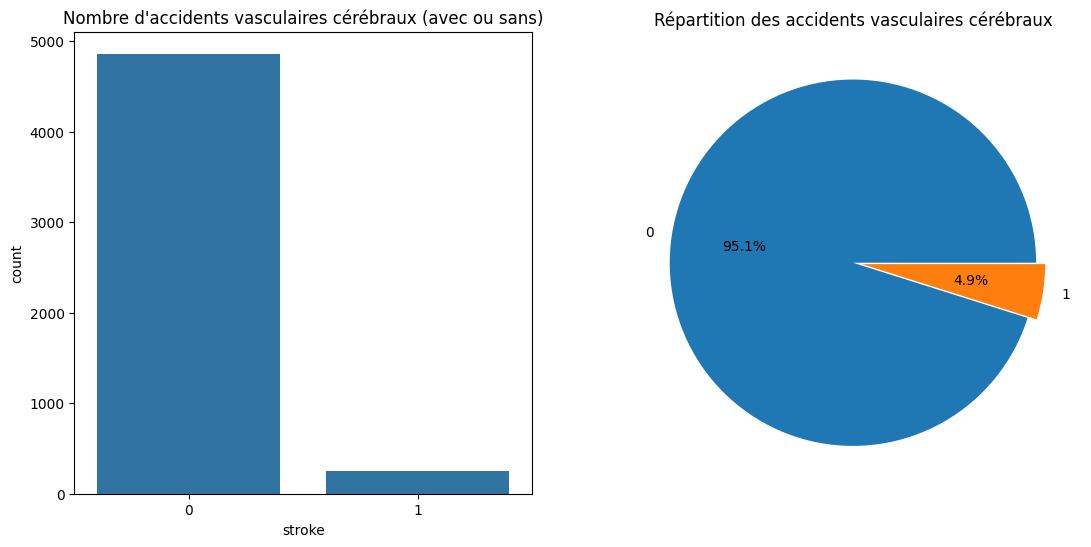

In [ ]:
# La distribution de la variable de résultat dans les données a été examinée et visualisée.
f, ax = plt.subplots(1, 2, figsize=(13, 6))

sns.countplot(x='stroke', data=data, ax=ax[0])
ax[0].set_title("Nombre d'accidents vasculaires cérébraux (avec ou sans)")

data['stroke'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Répartition des accidents vasculaires cérébraux')
ax[1].set_ylabel('')

plt.show()

# **Étape 5 : Remplir les valeurs nulles dans 'bmi'**

Nous traitons les valeurs nulles dans la colonne 'bmi' en calculant la moyenne et en les remplaçant par cette moyenne.

In [ ]:
# Afficher le décompte des valeurs uniques dans la colonne 'bmi'
print(data['bmi'].value_counts())

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64


In [ ]:
# Afficher des statistiques descriptives pour la colonne 'bmi'
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
# Calculer la moyenne des valeurs de la colonne 'bmi'
bmi_mean = data['bmi'].mean()

# Remplacer les valeurs manquantes dans la colonne 'bmi' par la moyenne calculée
data['bmi'].fillna(bmi_mean, inplace=True)

In [ ]:
# Afficher à nouveau des statistiques descriptives pour la colonne 'bmi' après le remplacement des valeurs manquantes
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
# Afficher le nombre total de valeurs nulles dans chaque colonne du DataFrame
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Étape 6 : Supprimer la colonne inutile 'id'**

Nous supprimons la colonne 'id' du DataFrame, car elle n'apporte pas d'informations utiles pour notre modèle.

In [ ]:
# Supprimer la colonne 'id' du DataFrame, inplace=True applique le changement directement sur le DataFrame existant
data.drop('id', axis=1, inplace=True)

In [ ]:
# Afficher le DataFrame après la suppression de la colonne 'id'
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# **Étape 7 : Nettoyer les valeurs aberrantes**

Nous identifions et visualisons les valeurs aberrantes dans les données à l'aide de diagrammes en boîte.

In [ ]:
# Importer la fonction figure de matplotlib pour définir les propriétés de la figure
from matplotlib.pyplot import figure

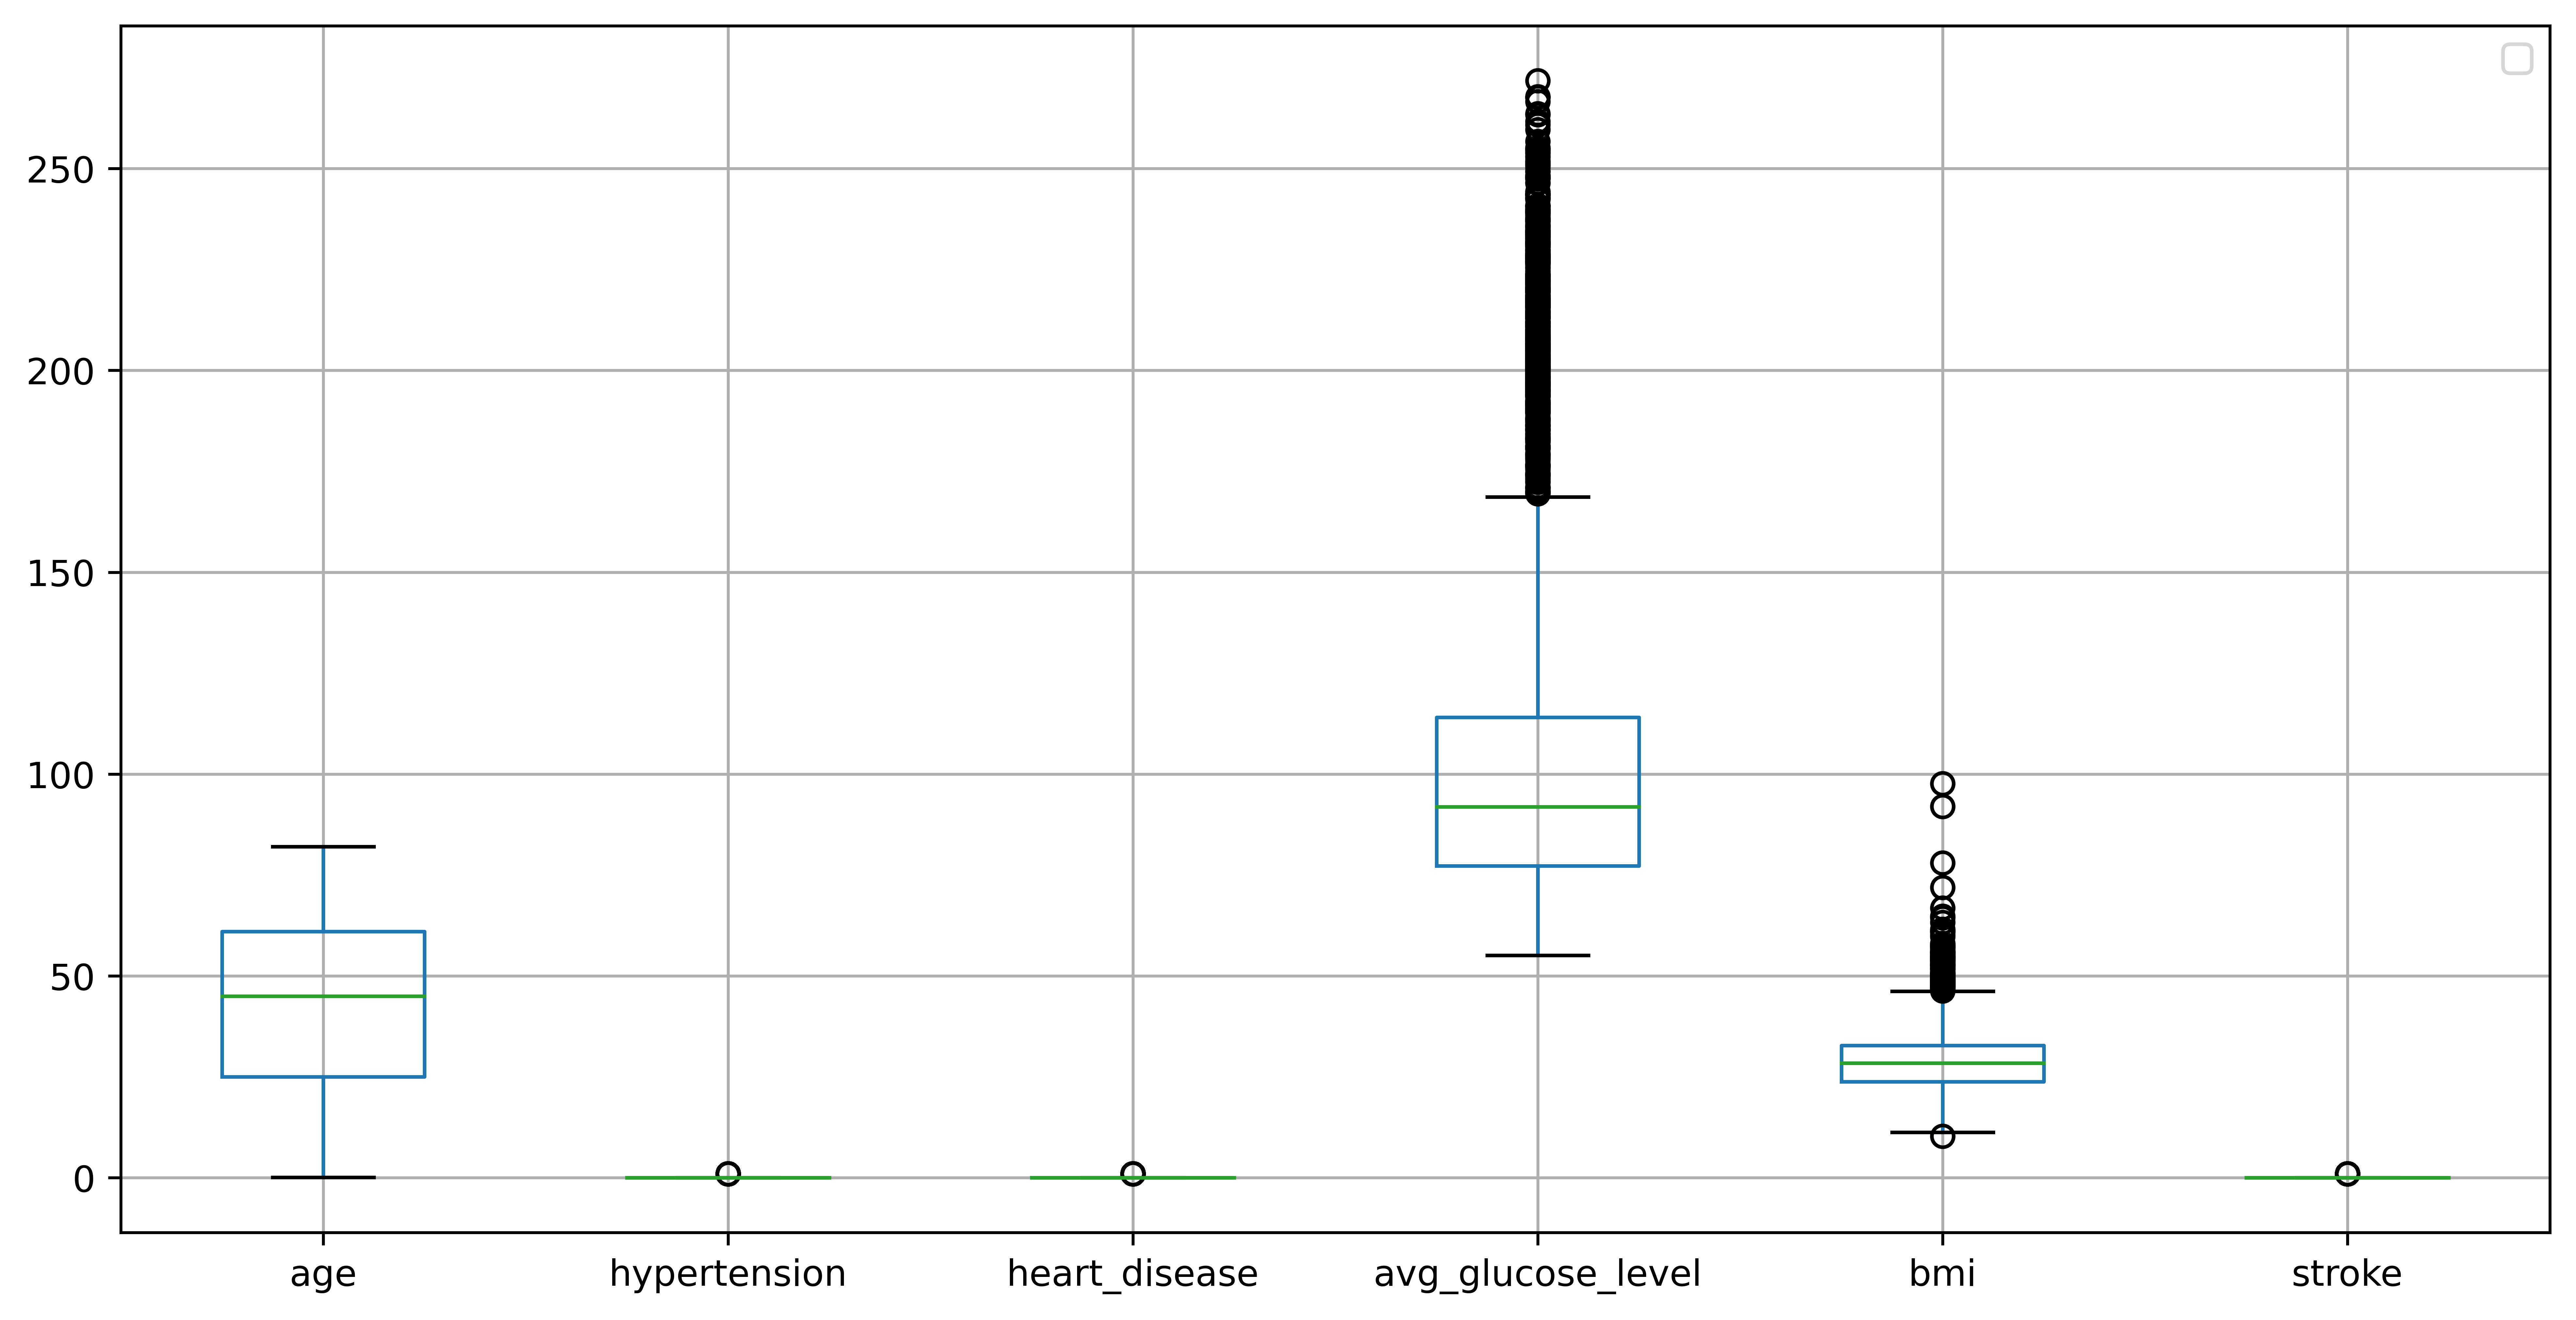

In [ ]:
# Créer une figure avec des propriétés spécifiées (numéro, taille, résolution, couleur de fond, couleur de bordure)
figure(num=None, figsize=(12, 6), dpi=800, facecolor='w', edgecolor='k')

# Afficher un diagramme en boîte (box plot) pour détecter les valeurs aberrantes dans les données
data.boxplot(widths=0.5)  # Ajuster la largeur des boîtes si nécessaire

# Ajouter une légende si nécessaire
plt.legend()

# Afficher la figure
plt.show()

# **Étape 8 : Encodage des étiquettes**

Nous effectuons l'encodage des étiquettes pour convertir les variables catégorielles en numériques.

In [ ]:
# Afficher les premières lignes du DataFrame après les étapes précédentes
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# Importer la classe LabelEncoder de scikit-learn pour l'encodage des étiquettes
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Appliquer l'encodage aux colonnes spécifiques du DataFrame
gender = label_encoder.fit_transform(data['gender'])
ever_married = label_encoder.fit_transform(data['ever_married'])
work_type = label_encoder.fit_transform(data['work_type'])
Residence_type = label_encoder.fit_transform(data['Residence_type'])
smoking_status = label_encoder.fit_transform(data['smoking_status'])

In [ ]:
# Mettre à jour les colonnes du DataFrame avec les valeurs encodées
data['work_type'] = work_type
data['ever_married'] = ever_married
data['Residence_type'] = Residence_type
data['gender'] = gender
data['smoking_status'] = smoking_status

In [ ]:
# Afficher le DataFrame mis à jour
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
# Afficher des informations sur le DataFrame après les encodages
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# **Étape 9 : Diviser les données en ensembles d'entraînement et de test**

Nous divisons nos données en ensembles d'entraînement et de test (80% pour l'entraînement et 20% pour les tests). Cette étape est cruciale pour évaluer les performances de nos modèles de prédiction sur des données non vues. Nous utilisons la fonction train_test_split de scikit-learn pour accomplir cette tâche.



In [ ]:
def augmente_dataset(df, noise_variance=0.025):
    # Séparer les lignes en deux groupes en fonction de la valeur de la colonne "stroke"
    df_minority = df[df['stroke'] == 1]
    df_majority = df[df['stroke'] == 0]  # d'après le graphique il y a bc plus de 0

    from sklearn.utils import resample
    # Effectuer la data augmentation en dupliquant aléatoirement les lignes du groupe minoritaire jusqu'à ce qu'il ait le même nombre de lignes que le groupe majoritaire
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority) - len(df_minority),
                                     random_state=123)

    # Ajouter un peu de bruit aux nouvelles lignes en générant des valeurs aléatoires à partir d'une distribution normal
    noise = np.random.normal(0, noise_variance, (df_minority_upsampled.shape[0], df_minority_upsampled.shape[1] - 1))
    cols = df_minority_upsampled.columns[:-1]
    df_minority_upsampled.loc[:, cols] = np.abs(df_minority_upsampled.loc[:, cols] + noise)
    df_minority_upsampled

    # Concaténer les deux groupes en un seul jeu de données équilibré
    df_augmented = pd.concat([df_majority, df_minority, df_minority_upsampled])
    df_augmented.shape

    # Mélanger les lignes pour éviter tout biais
    df_augmented = df_augmented.sample(frac=1, random_state=123).reset_index(drop=True)

    return df_augmented


print(data.shape)
data = augmente_dataset(data, noise_variance=0.02)

print(data.shape)
data.describe()

(5110, 11)
(9722, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.424640,54.859357,0.182094,0.125605,0.768538,2.100346,0.530349,118.354697,29.551959,1.446403,0.500000
std,0.490385,22.244927,0.378700,0.322507,0.420650,1.005090,0.495764,55.154528,6.953965,1.027486,0.500026
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,0.964774,1.995532,0.000000,78.025044,25.400000,0.963499,0.000000
50%,0.021062,58.998997,0.001888,0.000194,1.000000,2.000000,0.974993,96.608764,28.893237,1.981514,0.500000
75%,1.000000,74.959209,0.025674,0.018783,1.000000,2.988240,1.000000,145.257500,32.766712,2.000189,1.000000
max,2.000000,82.063460,1.070076,1.065285,1.074978,4.042305,1.075330,271.774924,97.600000,3.078541,1.000000


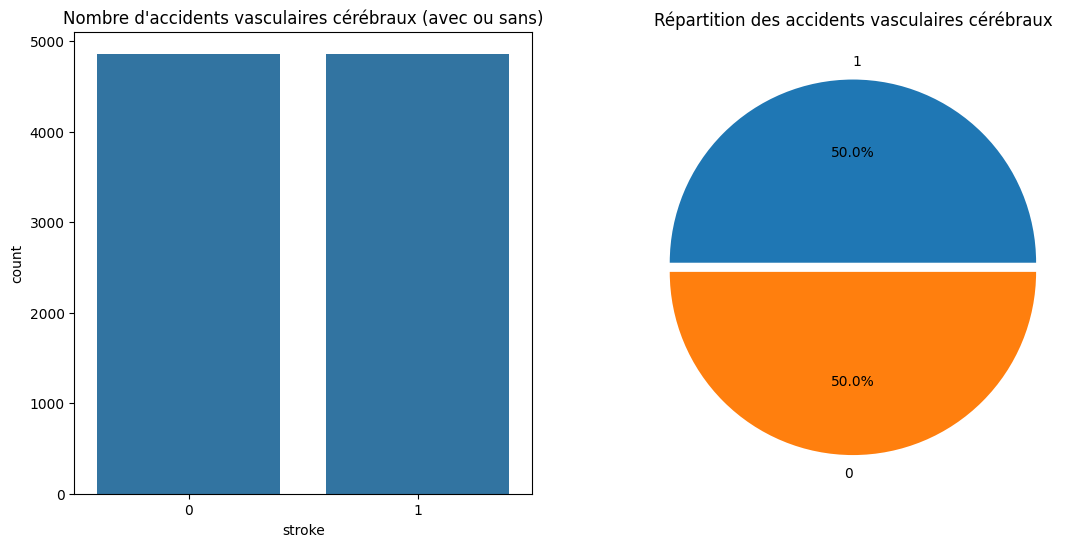

In [ ]:
# La distribution de la variable de résultat dans les données a été examinée et visualisée.
f, ax = plt.subplots(1, 2, figsize=(13, 6))

sns.countplot(x='stroke', data=data, ax=ax[0])
ax[0].set_title("Nombre d'accidents vasculaires cérébraux (avec ou sans)")

data['stroke'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Répartition des accidents vasculaires cérébraux')
ax[1].set_ylabel('')

plt.show()

In [ ]:
# Diviser les données en features (X) et la cible (Y)
X = data.drop('stroke', axis=1)
print(X.head())

Y = data['stroke']
print(Y)

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  
0               1             228.69  36.600000               1  
1               0             202.21  29.585363               2  
2               0             105.92  32.500000               2  
3               1             171.23  34.400000               3  
4               0             174.12  24.000000               2  
0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64


In [ ]:
# Diviser les données en ensembles d'entraînement et de test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test = pd.concat([X_test, Y_test], axis=1)

In [ ]:
data_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1304,0,46.0,0,0,0,2,0,79.63,55.000000,0,0
6763,0,81.0,1,0,1,3,0,74.02,25.000000,2,1
9053,1,78.0,1,0,1,3,0,134.80,33.600000,0,1
7627,1,58.0,0,0,1,2,0,189.84,29.585363,0,1
8108,0,81.0,1,0,1,2,0,80.43,29.700000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9372,1,59.0,0,0,1,2,0,211.78,29.585363,1,1
7291,1,61.0,0,1,1,2,1,209.86,29.585363,0,1
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3,0
7293,1,51.0,1,0,1,2,1,112.16,42.500000,1,1


In [ ]:
data_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2167,1,40.0,0,0,1,2,0,80.25,30.3,1,0
9191,1,58.0,0,1,1,2,0,240.59,31.4,3,1
2790,1,10.0,0,0,0,4,0,68.94,18.0,0,0
1733,0,45.0,0,0,1,2,0,77.19,37.2,3,0
2318,0,51.0,1,0,1,2,1,173.96,31.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2511,1,28.0,0,0,0,2,1,116.02,36.6,1,0
1302,0,65.0,0,0,1,3,0,167.31,27.1,2,0
8216,0,38.0,0,0,0,3,1,82.28,24.0,1,1
3806,0,18.0,0,0,0,2,0,92.71,24.1,0,0


In [ ]:
# Afficher les premières lignes des features d'entraînement
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1304,0,46.0,0,0,0,2,0,79.63,55.000000,0
6763,0,81.0,1,0,1,3,0,74.02,25.000000,2
9053,1,78.0,1,0,1,3,0,134.80,33.600000,0
7627,1,58.0,0,0,1,2,0,189.84,29.585363,0
8108,0,81.0,1,0,1,2,0,80.43,29.700000,2
...,...,...,...,...,...,...,...,...,...,...
9372,1,59.0,0,0,1,2,0,211.78,29.585363,1
7291,1,61.0,0,1,1,2,1,209.86,29.585363,0
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
7293,1,51.0,1,0,1,2,1,112.16,42.500000,1


In [ ]:
# Afficher les premières lignes de la cible d'entraînement
Y_train

1304    0
6763    1
9053    1
7627    1
8108    1
       ..
9372    1
7291    1
1344    0
7293    1
1289    0
Name: stroke, Length: 7777, dtype: int64

In [ ]:
# Afficher les premières lignes des features de test
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2167,1,40.0,0,0,1,2,0,80.25,30.3,1
9191,1,58.0,0,1,1,2,0,240.59,31.4,3
2790,1,10.0,0,0,0,4,0,68.94,18.0,0
1733,0,45.0,0,0,1,2,0,77.19,37.2,3
2318,0,51.0,1,0,1,2,1,173.96,31.2,1
...,...,...,...,...,...,...,...,...,...,...
2511,1,28.0,0,0,0,2,1,116.02,36.6,1
1302,0,65.0,0,0,1,3,0,167.31,27.1,2
8216,0,38.0,0,0,0,3,1,82.28,24.0,1
3806,0,18.0,0,0,0,2,0,92.71,24.1,0


In [ ]:
# Afficher les premières lignes de la cible de test
Y_test

2167    0
9191    1
2790    0
1733    0
2318    0
       ..
2511    0
1302    0
8216    1
3806    0
3776    0
Name: stroke, Length: 1945, dtype: int64

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1304,0,46.0,0,0,0,2,0,79.63,55.000000,0
6763,0,81.0,1,0,1,3,0,74.02,25.000000,2
9053,1,78.0,1,0,1,3,0,134.80,33.600000,0
7627,1,58.0,0,0,1,2,0,189.84,29.585363,0
8108,0,81.0,1,0,1,2,0,80.43,29.700000,2
...,...,...,...,...,...,...,...,...,...,...
9372,1,59.0,0,0,1,2,0,211.78,29.585363,1
7291,1,61.0,0,1,1,2,1,209.86,29.585363,0
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
7293,1,51.0,1,0,1,2,1,112.16,42.500000,1


In [ ]:
Y_train

1304    0
6763    1
9053    1
7627    1
8108    1
       ..
9372    1
7291    1
1344    0
7293    1
1289    0
Name: stroke, Length: 7777, dtype: int64

# **Étape 10 : Normaliser les données**

Nous normalisons les données pour mettre toutes les variables à la même échelle, ce qui est important pour certains algorithmes.

In [ ]:
# Afficher des statistiques descriptives sur les données avant la normalisation
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.423678,54.844246,0.176815,0.118083,0.764040,2.092471,0.524481,118.669509,29.585363,1.439827,0.500000
std,0.494374,22.238054,0.381532,0.322723,0.424619,1.010788,0.499426,55.361356,6.898662,1.032309,0.500026
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,1.000000,2.000000,0.000000,78.180000,25.400000,1.000000,0.000000
50%,0.000000,59.000000,0.000000,0.000000,1.000000,2.000000,1.000000,96.870000,29.585363,2.000000,0.500000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,3.000000,1.000000,145.490000,32.600000,2.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
# Importer la classe StandardScaler de scikit-learn pour la normalisation
from sklearn.preprocessing import StandardScaler

In [ ]:
# Créer une instance de StandardScaler
scaler = StandardScaler()

In [ ]:
# Normaliser les features d'entraînement
X_train_std = scaler.fit_transform(X_train)

In [ ]:
X_train_std

array([[-0.85651396, -0.41000168, -0.46507691, ..., -0.70656711,
         3.68786367, -1.39777817],
       [-0.85651396,  1.16982585,  2.15018202, ..., -0.80808124,
        -0.66284571,  0.53820061],
       [ 1.16629474,  1.03441206,  2.15018202, ...,  0.29174566,
         0.58435764, -1.39777817],
       ...,
       [ 1.16629474, -0.36486375, -0.46507691, ..., -0.58460539,
         1.39649006,  1.50618999],
       [ 1.16629474, -0.18431203,  2.15018202, ..., -0.11792991,
         1.87506809, -0.42978878],
       [-0.85651396,  1.12468792, -0.46507691, ..., -0.83359549,
        -0.28578423,  0.53820061]])

In [ ]:
# Normaliser les features de test
X_test_std = scaler.transform(X_test)

In [ ]:
# Afficher des statistiques descriptives sur les données normalisées
pd.DataFrame(X_train_std, columns=X.columns).describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03,7.777000e+03
mean,-9.867380e-17,5.664607e-17,4.705278e-17,2.512527e-17,-6.441206e-17,-1.635427e-16,1.361333e-16,5.116419e-17,2.092250e-16,4.933690e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-8.565140e-01,-2.482735e+00,-4.650769e-01,-3.689956e-01,-1.810463e+00,-2.058202e+00,-1.046469e+00,-1.150081e+00,-2.794693e+00,-1.397778e+00
25%,-8.565140e-01,-5.905534e-01,-4.650769e-01,-3.689956e-01,5.523448e-01,-8.548364e-02,-1.046469e+00,-7.328052e-01,-6.048363e-01,-4.297888e-01
50%,-8.565140e-01,1.767914e-01,-4.650769e-01,-3.689956e-01,5.523448e-01,-8.548364e-02,9.555946e-01,-3.949676e-01,2.140318e-03,5.382006e-01
75%,1.166295e+00,8.989983e-01,-4.650769e-01,-3.689956e-01,5.523448e-01,9.008758e-01,9.555946e-01,4.962215e-01,4.393340e-01,5.382006e-01
max,3.189103e+00,1.214964e+00,2.150182e+00,2.710059e+00,5.523448e-01,1.887235e+00,9.555946e-01,2.769704e+00,9.865871e+00,1.506190e+00


In [ ]:
# Afficher les premières lignes des features d'entraînement normalisées
pd.DataFrame(X_train_std, columns=X.columns).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.856514,-0.410002,-0.465077,-0.368996,-1.810463,-0.085484,-1.046469,-0.706567,3.687864,-1.397778
1,-0.856514,1.169826,2.150182,-0.368996,0.552345,0.900876,-1.046469,-0.808081,-0.662846,0.538201
2,1.166295,1.034412,2.150182,-0.368996,0.552345,0.900876,-1.046469,0.291746,0.584358,-1.397778
3,1.166295,0.131653,-0.465077,-0.368996,0.552345,-0.085484,-1.046469,1.287706,0.002140,-1.397778
4,-0.856514,1.169826,2.150182,-0.368996,0.552345,-0.085484,-1.046469,-0.692091,0.018765,0.538201


# **Étape 11 : Sauvegarder l'objet de normalisation**

Nous sauvegardons l'objet de normalisation pour pouvoir le réutiliser lors de la préparation de nouvelles données.

In [ ]:
# Importer la bibliothèque pickle pour la sauvegarde de l'objet de normalisation
import pickle

In [ ]:
# Définir le chemin de sauvegarde pour l'objet de normalisation
scaler_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/scaler.pkl')

# Sauvegarder l'objet de normalisation dans un fichier
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
# Afficher les premières lignes des features d'entraînement normalisées
pd.DataFrame(X_train_std, columns=X.columns).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.856514,-0.410002,-0.465077,-0.368996,-1.810463,-0.085484,-1.046469,-0.706567,3.687864,-1.397778
1,-0.856514,1.169826,2.150182,-0.368996,0.552345,0.900876,-1.046469,-0.808081,-0.662846,0.538201
2,1.166295,1.034412,2.150182,-0.368996,0.552345,0.900876,-1.046469,0.291746,0.584358,-1.397778
3,1.166295,0.131653,-0.465077,-0.368996,0.552345,-0.085484,-1.046469,1.287706,0.002140,-1.397778
4,-0.856514,1.169826,2.150182,-0.368996,0.552345,-0.085484,-1.046469,-0.692091,0.018765,0.538201


In [ ]:
# Afficher les premières lignes des features de test normalisées
pd.DataFrame(X_test_std, columns=X.columns).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.166295,-0.680829,-0.465077,-0.368996,0.552345,-0.085484,-1.046469,-0.695348,0.105780,-0.429789
1,1.166295,0.131653,-0.465077,2.710059,0.552345,-0.085484,-1.046469,2.206038,0.265306,1.506190
2,1.166295,-2.034967,-0.465077,-0.368996,-1.810463,1.887235,-1.046469,-0.900005,-1.678011,-1.397778
3,-0.856514,-0.455140,-0.465077,-0.368996,0.552345,-0.085484,-1.046469,-0.750719,1.106443,1.506190
4,-0.856514,-0.184312,2.150182,-0.368996,0.552345,-0.085484,0.955595,1.000354,0.236301,-0.429789


# **Étape 12 : Modèle Arbre de Décision (Decision Tree Model)**

Nous utilisons le modèle d'Arbre de Décision pour entraîner un modèle prédictif sur nos données.

In [ ]:
# Importer le modèle d'Arbre de Décision de scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Créer une instance du modèle d'Arbre de Décision
dt_model = DecisionTreeClassifier()

In [ ]:
# Entraîner le modèle d'Arbre de Décision sur les données d'entraînement normalisées
dt_model.fit(X_train_std, Y_train)

DecisionTreeClassifier()

In [ ]:
# Afficher l'importance des features dans le modèle d'arbre de décision
dt_model.feature_importances_

array([0.0169119 , 0.45228418, 0.0157808 , 0.00758532, 0.00958242,
       0.03074802, 0.00719402, 0.18809656, 0.21757166, 0.05424513])

In [ ]:
# Afficher les noms des features
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
# Prédire les classes sur les données de test
Y_pred_dt = dt_model.predict(X_test_std)
Y_pred_dt

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Calculer l'exactitude du modèle d'arbre de décision
ac_dt = accuracy_score(Y_test, Y_pred_dt)

# Afficher l'exactitude du modèle d'arbre de décision
print("Précision du modèle d'arbre de décision :", ac_dt * 100, "%")

Précision du modèle d'arbre de décision : 97.37789203084833 %


In [ ]:
# Importer la bibliothèque joblib pour sauvegarder le modèle
import joblib

# Définir le chemin pour sauvegarder le modèle d'arbre de décision
model_path_dt = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/dt_model.sav')

# Sauvegarder le modèle d'arbre de décision dans un fichier
joblib.dump(dt_model, model_path_dt)

['/content/drive/MyDrive/Colab Notebooks/mespi/models/dt_model.sav']

# **Étape 13 : Modèle Régression Logistique (Logistic Regression Model)**

Nous utilisons le modèle de Régression Logistique pour entraîner un autre modèle prédictif.

In [ ]:
# Importer le modèle de régression logistique de scikit-learn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Créer une instance du modèle de régression logistique
lr_model = LogisticRegression()

In [ ]:
# Entraîner le modèle de régression logistique sur les données d'entraînement normalisées
lr_model.fit(X_train_std, Y_train)

LogisticRegression()

In [ ]:
# Prédire les classes sur les données de test avec le modèle de régression logistique
Y_pred_lr = lr_model.predict(X_test_std)
Y_pred_lr

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Calculer l'exactitude du modèle de régression logistique
ac_lr = accuracy_score(Y_test, Y_pred_lr)

# Afficher la précision du modèle de régression logistique
print("Précision du modèle de régression logistique :", ac_lr * 100, "%")

Précision du modèle de régression logistique : 76.24678663239075 %


In [ ]:
# Importer la bibliothèque joblib pour sauvegarder le modèle
import joblib

# Définir le chemin pour sauvegarder le modèle de régression logistique
model_path_lr = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/lr_model.sav')

# Sauvegarder le modèle de régression logistique dans un fichier
joblib.dump(lr_model, model_path_lr)

['/content/drive/MyDrive/Colab Notebooks/mespi/models/lr_model.sav']

# **Étape 14 : Modèle KNN (KNN Model)**

Nous utilisons le modèle KNN pour entraîner un troisième modèle prédictif.



In [ ]:
# Importer le modèle KNN de scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Créer une instance du modèle KNN
knn_model = KNeighborsClassifier()

In [ ]:
# Entraîner le modèle KNN sur les données d'entraînement normalisées
knn_model.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [ ]:
# Prédire les classes sur les données de test avec le modèle KNN
Y_pred_knn = knn_model.predict(X_test_std)
Y_pred_knn

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Calculer l'exactitude du modèle KNN
ac_knn = accuracy_score(Y_test, Y_pred_knn)

# Afficher la précision du modèle KNN
print("Précision du modèle KNN :", ac_knn * 100, "%")

Précision du modèle KNN : 91.82519280205655 %


In [ ]:
# Importer la bibliothèque joblib pour sauvegarder le modèle
import joblib

# Définir le chemin pour sauvegarder le modèle KNN
model_path_knn = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/knn_model.sav')

# Sauvegarder le modèle KNN dans un fichier
joblib.dump(knn_model, model_path_knn)

['/content/drive/MyDrive/Colab Notebooks/mespi/models/knn_model.sav']

# **Étape 15 : Modèle Forêt Aléatoire (Random Forest Model)**

Nous utilisons le modèle de Forêt Aléatoire pour entraîner un quatrième modèle prédictif.

In [ ]:
# Importer le modèle de forêt aléatoire de scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Créer une instance du modèle de forêt aléatoire
rf_model = RandomForestClassifier()

In [ ]:
# Entraîner le modèle de forêt aléatoire sur les données d'entraînement normalisées
rf_model.fit(X_train_std, Y_train)

RandomForestClassifier()

In [ ]:
# Prédire les classes sur les données de test avec le modèle de forêt aléatoire
Y_pred_rf = rf_model.predict(X_test_std)
Y_pred_rf

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Calculer l'exactitude du modèle de forêt aléatoire
ac_rf = accuracy_score(Y_test, Y_pred_rf)

# Afficher la précision du modèle de forêt aléatoire
print("Précision du modèle de forêt aléatoire :", ac_rf * 100, "%")

Précision du modèle de forêt aléatoire : 99.28020565552698 %


In [ ]:
# Importer la bibliothèque joblib pour sauvegarder le modèle
import joblib

# Définir le chemin pour sauvegarder le modèle de forêt aléatoire
model_path_rf = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/rf_model.sav')

# Sauvegarder le modèle de forêt aléatoire dans un fichier
joblib.dump(rf_model, model_path_rf)

['/content/drive/MyDrive/Colab Notebooks/mespi/models/rf_model.sav']

# **Étape 16 : Modèle SVM (Support Vector Machine Model)**

Nous utilisons le modèle SVM pour entraîner un cinquième modèle prédictif.

In [ ]:
# Importer le modèle SVM de scikit-learn
from sklearn.svm import SVC

In [ ]:
# Créer une instance du modèle SVM
svm_model = SVC()

In [ ]:
# Entraîner le modèle SVM sur les données d'entraînement normalisées
svm_model.fit(X_train_std, Y_train)

SVC()

In [ ]:
# Prédire les classes sur les données de test avec le modèle SVM
Y_pred_svm = svm_model.predict(X_test_std)

Y_pred_svm

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Calculer l'exactitude du modèle SVM
ac_svm = accuracy_score(Y_test, Y_pred_svm)

# Afficher la précision du modèle SVM
print("Précision du modèle SVM :", ac_svm * 100, "%")

Précision du modèle SVM : 82.26221079691517 %


In [ ]:
# Importer la bibliothèque joblib pour sauvegarder le modèle
import joblib

# Définir le chemin pour sauvegarder le modèle SVM
model_path_svm = os.path.join('/content/drive/MyDrive/Colab Notebooks/mespi/', 'models/svm_model.sav')

# Sauvegarder le modèle SVM dans un fichier
joblib.dump(svm_model, model_path_svm)

['/content/drive/MyDrive/Colab Notebooks/mespi/models/svm_model.sav']

# **Étape 17 : Visualiser la précision**

Nous visualisons la précision de chaque modèle à l'aide d'un diagramme à barres, ce qui nous permet de comparer leurs performances.

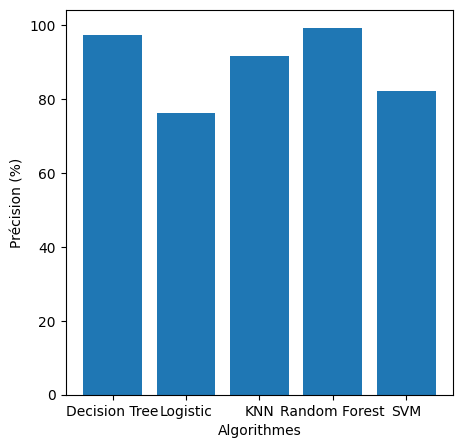

In [ ]:
# Créer un diagramme à barres pour comparer les performances des modèles en pourcentage
plt.bar(['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM'], [ac_dt * 100, ac_lr * 100, ac_knn * 100, ac_rf * 100, ac_svm * 100])

# Ajouter des étiquettes aux axes
plt.xlabel("Algorithmes")
plt.ylabel("Précision (%)")

# Afficher le diagramme
plt.show()

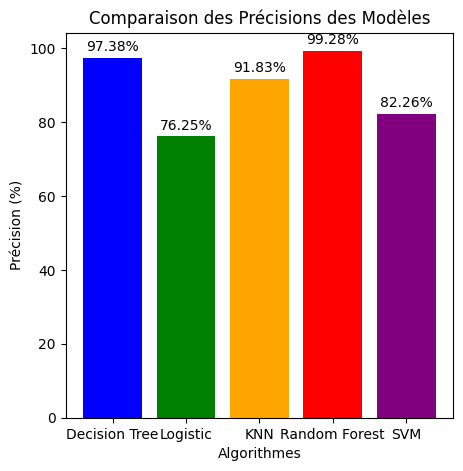

In [ ]:
# Créer un diagramme à barres avec des couleurs distinctes pour chaque modèle et ajout du pourcentage sur chaque colonne
colors = ['blue', 'green', 'orange', 'red', 'purple']
accuracy_values = [ac_dt, ac_lr, ac_knn, ac_rf, ac_svm]
percentage_values = [value * 100 for value in accuracy_values]

plt.bar(['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM'], percentage_values, color=colors)

# Ajouter des étiquettes aux axes
plt.xlabel("Algorithmes")
plt.ylabel("Précision (%)")

# Ajouter le pourcentage au-dessus de chaque barre
for i, value in enumerate(percentage_values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Ajouter un titre
plt.title("Comparaison des Précisions des Modèles")

# Afficher le diagramme
plt.show()


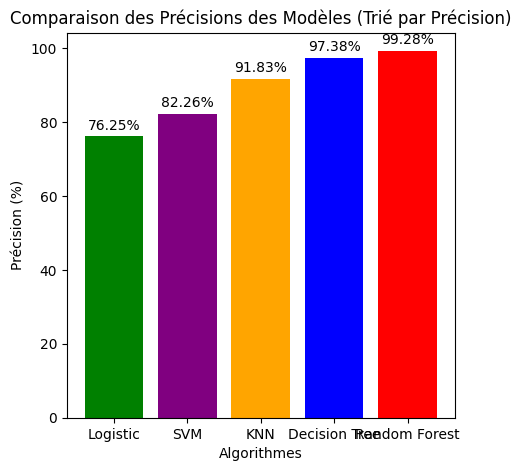

In [ ]:
# Créer un diagramme à barres avec des couleurs distinctes pour chaque modèle et ajout du pourcentage sur chaque colonne
colors = ['blue', 'green', 'orange', 'red', 'purple']
accuracy_values = [ac_dt, ac_lr, ac_knn, ac_rf, ac_svm]
percentage_values = [value * 100 for value in accuracy_values]

# Trier les valeurs et les couleurs en fonction des précisions
sorted_values, sorted_colors = zip(*sorted(zip(percentage_values, colors)))

plt.bar(['Logistic', 'SVM',  'KNN', 'Decision Tree', 'Random Forest'], sorted_values, color=sorted_colors)

# Ajouter des étiquettes aux axes
plt.xlabel("Algorithmes")
plt.ylabel("Précision (%)")

# Ajouter le pourcentage au-dessus de chaque barre
for i, value in enumerate(sorted_values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Ajouter un titre
plt.title("Comparaison des Précisions des Modèles (Trié par Précision)")

# Afficher le diagramme
plt.show()
